Huang-Rhys factor S = 0.125


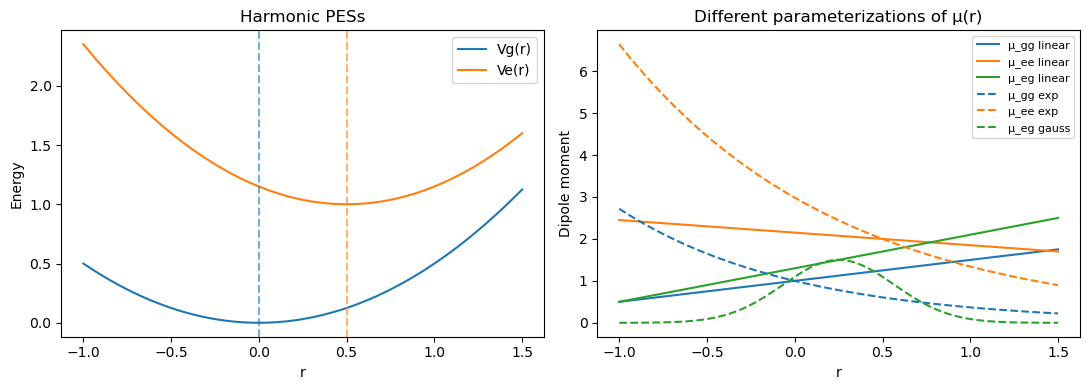

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- physical parameters ---
k_g = 1.0     # ground-state force constant
k_e = 1.2     # excited-state force constant
r_g = 0.0     # equilibrium position ground state
r_e = 0.5     # equilibrium position excited state
m = 1.0       # reduced mass (arb. units)
hbar = 1.0

# --- derived quantities ---
omega_g = np.sqrt(k_g / m)
omega_e = np.sqrt(k_e / m)
S = 0.5 * m * omega_g / hbar * (r_e - r_g)**2
print(f"Huang-Rhys factor S = {S:.3f}")

# coordinate grid
r = np.linspace(-1.0, 1.5, 400)

# --- Potential energy surfaces ---
Vg = 0.5 * k_g * (r - r_g)**2
Ve = 0.5 * k_e * (r - r_e)**2 + 1.0  # offset excited PES for clarity

# --- Dipole moment parameterizations ---

def mu_linear(r, mu0, dmu, r0):
    """Linear Herzberg–Teller form."""
    return mu0 + dmu * (r - r0)

def mu_exponential(r, mu0, alpha, r0):
    """Exponential form."""
    return mu0 * np.exp(-alpha * (r - r0))

def mu_gaussian(r, mu0, beta, r0):
    """Gaussian (transition dipole-like) form."""
    return mu0 * np.exp(-beta * (r - r0)**2)

# --- Example parameters ---
mu_g0, mu_e0, mu_eg0 = 1.0, 2.0, 1.5
dmu_g, dmu_e, dmu_eg = 0.5, -0.3, 0.8
alpha_g, alpha_e, beta_eg = 1.0, 0.8, 5.0

# --- Build each form ---
mu_g_linear = mu_linear(r, mu_g0, dmu_g, r_g)
mu_e_linear = mu_linear(r, mu_e0, dmu_e, r_e)
mu_eg_linear = mu_linear(r, mu_eg0, dmu_eg, 0.5*(r_g + r_e))

mu_g_exp = mu_exponential(r, mu_g0, alpha_g, r_g)
mu_e_exp = mu_exponential(r, mu_e0, alpha_e, r_e)
mu_eg_gauss = mu_gaussian(r, mu_eg0, beta_eg, 0.5*(r_g + r_e))

# --- Plot potentials and dipoles ---
fig, axes = plt.subplots(1, 2, figsize=(11,4))

# (1) Potential energy surfaces
axes[0].plot(r, Vg, label="Vg(r)")
axes[0].plot(r, Ve, label="Ve(r)")
axes[0].axvline(r_g, color='C0', ls='--', alpha=0.6)
axes[0].axvline(r_e, color='C1', ls='--', alpha=0.6)
axes[0].set_xlabel("r")
axes[0].set_ylabel("Energy")
axes[0].set_title("Harmonic PESs")
axes[0].legend()

# (2) Dipole moment surfaces
axes[1].plot(r, mu_g_linear, 'C0', label="μ_gg linear")
axes[1].plot(r, mu_e_linear, 'C1', label="μ_ee linear")
axes[1].plot(r, mu_eg_linear, 'C2', label="μ_eg linear")
axes[1].plot(r, mu_g_exp, 'C0--', label="μ_gg exp")
axes[1].plot(r, mu_e_exp, 'C1--', label="μ_ee exp")
axes[1].plot(r, mu_eg_gauss, 'C2--', label="μ_eg gauss")
axes[1].set_xlabel("r")
axes[1].set_ylabel("Dipole moment")
axes[1].set_title("Different parameterizations of μ(r)")
axes[1].legend(fontsize=8)

plt.tight_layout()
plt.show()
